In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

import pandas as pd
data = pd.read_csv(file_path)

data.head()

Mounted at /content/drive


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numeric_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
scaler = MinMaxScaler()
X_train.loc[:, numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test.loc[:, numeric_features] = scaler.transform(X_test[numeric_features])

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes:
X_train: (56553, 21)
X_test: (14139, 21)
y_train: (56553,)
y_test: (14139,)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

#Training
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/30
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6972 - loss: 0.5826 - val_accuracy: 0.7460 - val_loss: 0.5133
Epoch 2/30
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7376 - loss: 0.5262 - val_accuracy: 0.7483 - val_loss: 0.5091
Epoch 3/30
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7436 - loss: 0.5205 - val_accuracy: 0.7498 - val_loss: 0.5100
Epoch 4/30
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7471 - loss: 0.5173 - val_accuracy: 0.7489 - val_loss: 0.5075
Epoch 5/30
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7492 - loss: 0.5138 - val_accuracy: 0.7491 - val_loss: 0.5053
Epoch 6/30
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7481 - loss: 0.5124 - val_accuracy: 0.7526 - val_loss: 0.5049
Epoch 7/30
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7484 - loss: 0.5138 - val_accuracy: 0.7520 - val_loss: 0.5048
Epoch 8/30
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7454 - loss: 0.5166 -

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5093, Test Accuracy: 0.7463


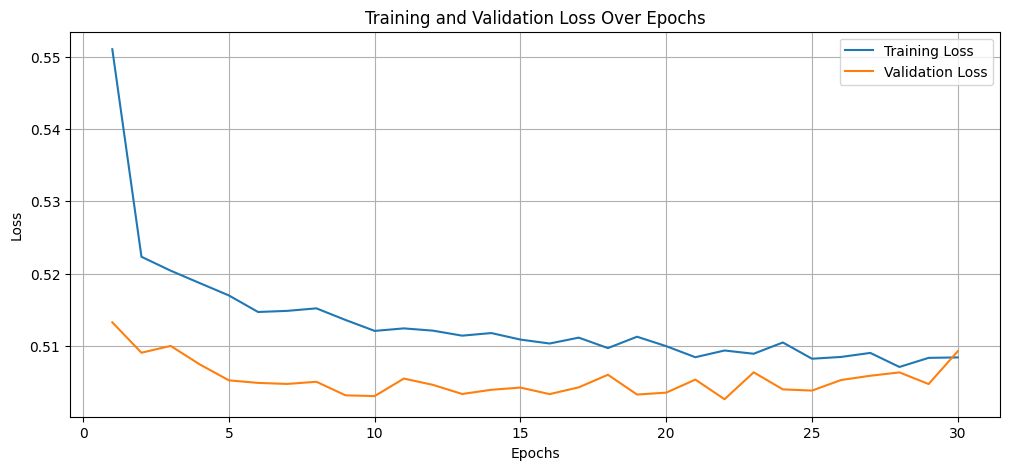

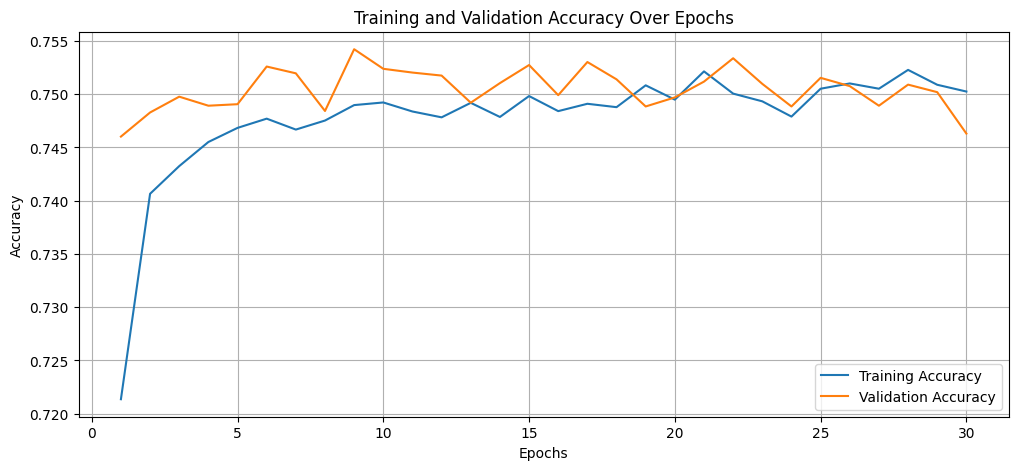

In [49]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


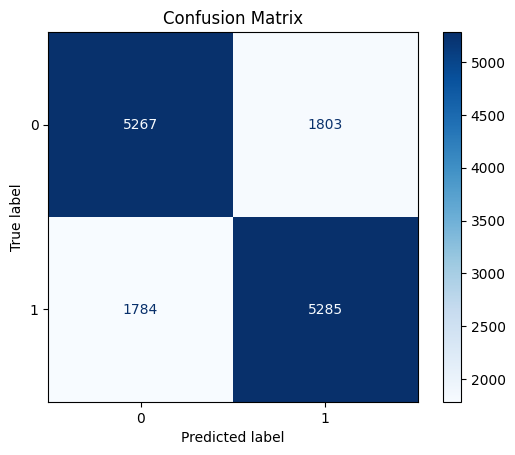

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_prob = model.predict(X_test)
y_pred_classes = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.75      0.74      0.75      7070
     Class 1       0.75      0.75      0.75      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

